# Complex and Simple Architechture Classifier

## Library Installed 

In [1]:
# pip install scikit-image

In [2]:
# !rm -f ./.ipynb_checkpoints

## Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
import os
from skimage import io
import splitfolders
import glob
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'splitfolders'

## Importing Data

In [4]:
DATASET_PATH = 'floor_data'
data_class = ['complex', 'simple']

In [5]:
floor_path = os.path.join(DATASET_PATH, data_class[1], '*')
print(floor_path)

floor_data/simple/*


In [6]:
floor_path = glob.glob(floor_path)
print(floor_path[1])

floor_data/simple/casa_719.jpeg


In [7]:
floor_path = os.path.join(DATASET_PATH, data_class[0], '*')
floor_path = glob.glob(floor_path)

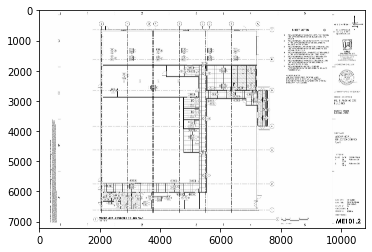

In [8]:
image = io.imread(floor_path[14])
plt.imshow(image)

## Splitting Data into Train and Test

In [9]:
splitfolders.ratio(DATASET_PATH, output="nn",
    seed=1337, ratio=(.7, .3), group_prefix=None, move=False)

Copying files: 340 files [00:01, 311.07 files/s]


## Image Pre-Processing

In [10]:
IMAGE_SIZE = [600, 600]

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('nn/train',
                                                 target_size = (600, 600),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle=True)

Found 236 images belonging to 2 classes.


In [13]:
!rm -rf ./nn/train/.ipynb_checkpoints

In [14]:
test_set = test_datagen.flow_from_directory('nn/val',
                                            target_size = (600, 600),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 104 images belonging to 2 classes.


In [15]:
!rm -rf ./nn/val/.ipynb_checkpoints

In [16]:
training_set.class_indices

{'complex': 0, 'simple': 1}

In [17]:
# training_set.shape

## VGG16 Model

In [18]:
# def base_model():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
#     # model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     # model.add(Dropout(0.25))

#     model.add(Conv2D(64, kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
#     # model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     # model.add(Dropout(0.25))


#     model.add(Flatten())
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

In [19]:
# pre_trained_model = tf.keras.applications.VGG16(input_shape=(600, 600, 3), include_top=False, weights="imagenet")

In [20]:
# for layer in pre_trained_model.layers:
#     print(layer.name)
#     layer.trainable = False

In [21]:
# last_layer = pre_trained_model.get_layer('block5_pool')
# last_output = last_layer.output
# x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

In [22]:
# x = tf.keras.layers.Dense(2, activation='softmax')(x)

In [23]:
# model = tf.keras.Model(pre_trained_model.input, x)

In [24]:
# model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [25]:
# model.summary()

In [26]:
# vgg_classifier = model.fit(training_set,
#                            steps_per_epoch=training_set.n//training_set.batch_size,
#                            epochs = 50,
#                            validation_data=test_set,
#                            validation_steps=test_set.n//test_set.batch_size,
#                            batch_size = 32,
#                            verbose = 1)

In [27]:
# plt.figure(figsize = (10,7))
# plt.plot(vgg_classifier.history['acc'])
# plt.plot(vgg_classifier.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0,1)
# plt.show()

In [28]:
from keras.models import load_model

# model.save('vgg_classifier.h5')

## Resnet50 Model

In [29]:
resnet = ResNet50(input_shape=(600, 600, 3), weights='imagenet', include_top=False)

2022-07-01 17:23:43.795920: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 17:23:43.796338: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 17:23:43.828315: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 17:23:43.828925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-01 17:23:43.829272: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

In [30]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [31]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [32]:
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [33]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 600, 600, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 606, 606, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 300, 300, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

 conv2_block2_add (Add)         (None, 150, 150, 25  0           ['conv2_block1_out[0][0]',       
                                6)                                'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 150, 150, 25  0           ['conv2_block2_add[0][0]']       
                                6)                                                                
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 150, 150, 64  16448       ['conv2_block2_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 150, 150, 64  256        ['conv2_block3_1_conv[0][0]']    
 ization) 

 conv3_block2_3_conv (Conv2D)   (None, 75, 75, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, 75, 75, 512)  2048       ['conv3_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_add (Add)         (None, 75, 75, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 75, 75, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 38, 38, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 38, 38, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_add (Add)         (None, 38, 38, 1024  0           ['conv4_block1_0_bn[0][0]',      
                                )                                 'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 38, 38, 1024  263168      ['conv4_block4_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 38, 38, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block4_add (Add)         (None, 38, 38, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
          

 conv5_block1_2_relu (Activatio  (None, 19, 19, 512)  0          ['conv5_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block1_0_conv (Conv2D)   (None, 19, 19, 2048  2099200     ['conv4_block6_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv5_block1_3_conv (Conv2D)   (None, 19, 19, 2048  1050624     ['conv5_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv5_block1_0_bn (BatchNormal  (None, 19, 19, 2048  8192       ['conv5_block1_0_conv[0][0]']    
 ization) 

__________________________________________________________________________________________________


In [34]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [35]:
resnet_classifier = model.fit_generator(
    training_set,
    steps_per_epoch=training_set.n//training_set.batch_size,
    epochs=20,
    validation_data=test_set,
    validation_steps=test_set.n//test_set.batch_size
)

Epoch 1/20


2022-07-01 17:23:55.619329: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201
2022-07-01 17:23:56.084116: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-01 17:23:56.084663: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-01 17:23:56.084685: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-01 17:23:56.085101: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-01 17:23:56.085153: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


7/7 [==============================] - 42s 6s/step - loss: 65.6768 - accuracy: 0.5312 - val_loss: 24.1272 - val_accuracy: 0.4896
Epoch 2/20
7/7 [==============================] - 39s 6s/step - loss: 20.6707 - accuracy: 0.6961 - val_loss: 2.6390 - val_accuracy: 0.9167
Epoch 3/20
7/7 [==============================] - 37s 5s/step - loss: 9.5031 - accuracy: 0.7941 - val_loss: 8.5706 - val_accuracy: 0.8021
Epoch 4/20
7/7 [==============================] - 36s 5s/step - loss: 7.4650 - accuracy: 0.8529 - val_loss: 13.0608 - val_accuracy: 0.6875
Epoch 5/20
7/7 [==============================] - 35s 5s/step - loss: 7.6960 - accuracy: 0.8578 - val_loss: 2.6699 - val_accuracy: 0.9583
Epoch 6/20
7/7 [==============================] - 36s 6s/step - loss: 4.2238 - accuracy: 0.9314 - val_loss: 2.2302 - val_accuracy: 0.9583
Epoch 7/20
7/7 [==============================] - 35s 5s/step - loss: 2.7468 - accuracy: 0.9657 - val_loss: 3.1092 - val_accuracy: 0.9479
Epoch 8/20
7/7 [=========================

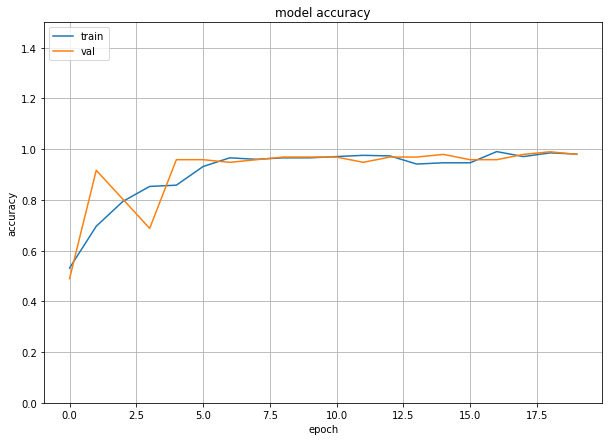

In [41]:
plt.figure(figsize = (10,7))
plt.plot(resnet_classifier.history['accuracy'])
plt.plot(resnet_classifier.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.show()

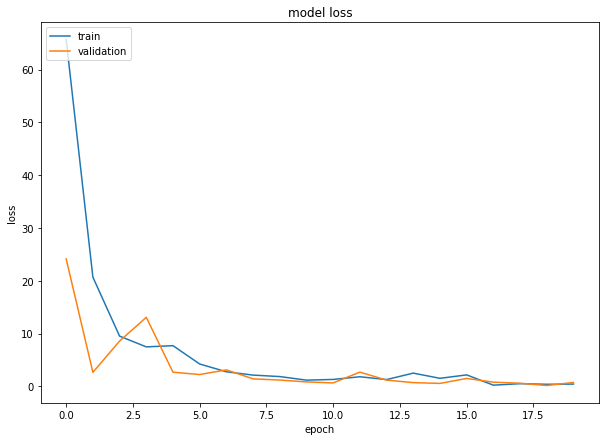

In [37]:
plt.figure(figsize = (10,7))
plt.plot(resnet_classifier.history['loss'])
plt.plot(resnet_classifier.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
model.save('resnet_classifier.h5')

In [1]:
# predict = model.predict()
test_set.to_pickle("test.pkl")

NameError: name 'test_set' is not defined